In [1]:
# Stefan Nielsen 2018 - various lib import:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.interactive(True)
from pylab import plot, xlabel, ylabel
from scipy import arange
# LeTeX support, with pslatex package :
plt.rc('text', usetex=True);plt.rc('font', family='serif')
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}',r'\usepackage{pslatex}']
########################

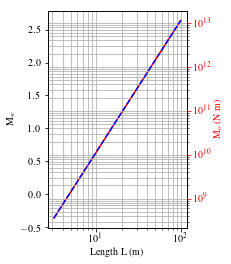

In [10]:
# plot log-log and log-lin on same graph
##########################################
def lolo(xx,yy,yy2,labx,laby,laby2):
    fig,ax=plt.subplots(figsize=(2.5,4))
    ax.semilogx(xx,yy,'r')
    xlabel(labx); ylabel(laby)
    ax.xaxis.grid(True,which='both',alpha=1)
    ax2 = ax.twinx()
    ax2.loglog(xx, yy2, 'b--')
    ax2.set_ylabel(laby2, color='r')
    ax2.tick_params('y', colors='r')
    ax2.yaxis.grid(True,which='both',alpha=1)
# end def
pows=np.linspace(0.5,2.,5);L=10**(pows)
sd=5e6;mo=(16/7)*sd*L**3;mag=(2/3)*(np.log10(mo)-9.1)
lolo(L,mag,mo,'Length L (m)','M$_w$','M$_o$ (N m)')
# save  figure to file
plt.savefig("dummy.svg")
########################


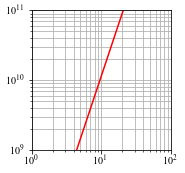

In [3]:
# set limits and aspect ratio
fig=plt.figure(figsize=(2.5,4));
ax = fig.add_subplot(111)
plt.loglog(L,mo,'r')
ax.set_aspect(1)
ax.xaxis.grid(True,which='both');ax.yaxis.grid(True,which='both')
ax.set_xlim([1e0,1e2]);ax.set_ylim([1e9,1e11]);
########################

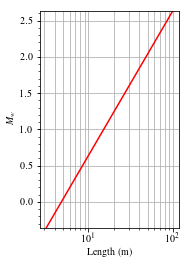

In [4]:
# define tick positions on the y axis:
fig=plt.figure(figsize=(2.5,4));
ax = fig.add_subplot(111)
plt.semilogx(L,mag,'r')
xlabel('Length (m)'); ylabel(r'$\texrtm{M}_w$')
ax.xaxis.grid(True,which='both')
ax.yaxis.grid(True,which='major')
yti=np.arange(round(min(mag))-3,round(max(mag)),.1);
ax.set_yticks(yti,minor=True);
ax.set_ylim([min(mag),max(mag)]);
########################

In [8]:
# make a 3 column array out of 3 vectors:
mags=[];lens=[];tims=[];
for i in range(10):
    meg=float(i)
    mags.append(meg)
    lens.append(10**(1+meg/2))
    tims.append(10**(1+meg/2)/2800)
np.transpose([mags,lens,tims])
########################

array([[  0.00000000e+00,   1.00000000e+01,   3.57142857e-03],
       [  1.00000000e+00,   3.16227766e+01,   1.12938488e-02],
       [  2.00000000e+00,   1.00000000e+02,   3.57142857e-02],
       [  3.00000000e+00,   3.16227766e+02,   1.12938488e-01],
       [  4.00000000e+00,   1.00000000e+03,   3.57142857e-01],
       [  5.00000000e+00,   3.16227766e+03,   1.12938488e+00],
       [  6.00000000e+00,   1.00000000e+04,   3.57142857e+00],
       [  7.00000000e+00,   3.16227766e+04,   1.12938488e+01],
       [  8.00000000e+00,   1.00000000e+05,   3.57142857e+01],
       [  9.00000000e+00,   3.16227766e+05,   1.12938488e+02]])

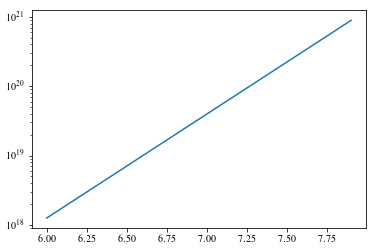

In [7]:
# define functions and compute in array of values:
def magmo(mom): mago=(2/3)(np.log10(mom)-9.1); return (mago)
def momag(mago): momag=10**(9.1+(3/2)*mago); return momag
momos=momag(5.9+0.1*np.linspace(1,20,10))
magos=5.9+0.1*np.linspace(1,20,10)
plt.figure();plt.semilogy(magos,momos);
########################


<IPython.core.display.Javascript object>


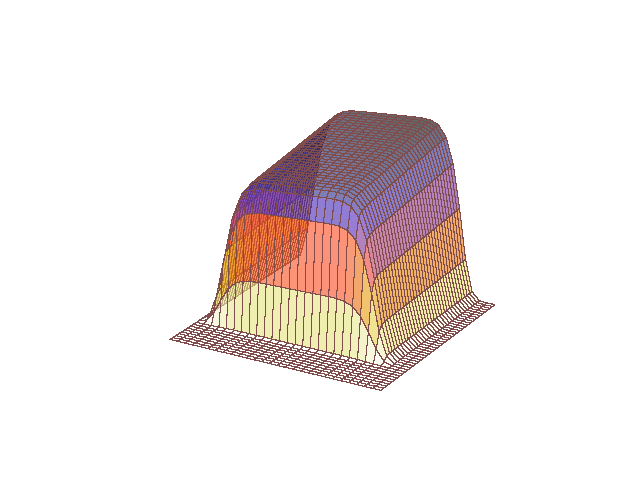

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import matplotlib.transforms
from matplotlib import cm
import numpy as np
%matplotlib notebook

def fun1():
    #Create the mesh in polar coordinates and compute corresponding Z.
    r = np.linspace(0, 1.25, 50)
    p = np.linspace(0, 2*np.pi, 50)
    R, P = np.meshgrid(r, p)
    Z = ((R**2 - 1)**2)
    # Express the mesh in the cartesian system.
    X, Y = R*np.cos(P), R*np.sin(P)
    return(X,Y,Z)
def fun2():
    x = np.arange(-2.5, 3.0, .2)
    y = np.arange(-6.0, 3.0, .2)
    X, Y = np.meshgrid(x, y)
    Z = np.exp(-(X/2)**8)*np.exp(-(Y/4)**32)*abs(X+50)*abs(Y+50)
    return (X,Y,Z)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Predefined colorscale examples
coco1=cm.PuBuGn;coco2=cm.YlGnBu_r;coco3=cm.coolwarm;coco4=cm.BuPu;coco5=cm.CMRmap_r;coco6=cm.Pastel1_r

# Plot the surface.
X,Y,Z=fun2()
ax.plot_surface(X, Y, Z, cmap=coco5, alpha=.6, shade=True, antialiased=False, linewidth=.02, 
                edgecolors=(.5,.3,.3))
#ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=7)
#ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r,linewidth=7)
#ax.plot_surface(X, Y, Z, linewidth=7)

# Tweak the limits and add latex math labels.
#ax.set_zlim(0, 5e3)
ax.tick_params(labelbottom=False)   
ax.tick_params(labelleft=False)   
ax.tick_params(labelright=False)   
#ax.set_xlabel(r'$\phi_\mathrm{real}$')
#ax.set_ylabel(r'$\phi_\mathrm{im}$')
#ax.set_zlabel(r'$V(\phi)$')
plt.axis('off')
plt.show()
bob = matplotlib.transforms.Bbox([[1.8, .9], [4.9, 3.7]])
plt.savefig('numgrid.pdf',bbox_inches=bob,pad_inches=0,transparent=True)
plt.savefig('numgrid.png',bbox_inches=bob,pad_inches=0,transparent=True)

<IPython.core.display.Javascript object>


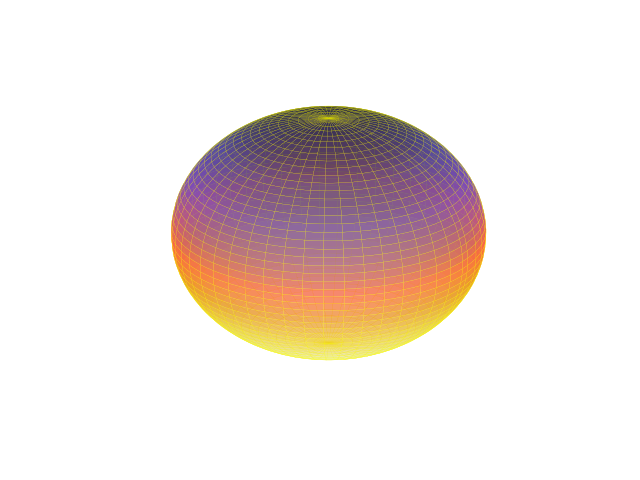

(-10.993329764835574,
 10.998363707289908,
 -10.997230983107517,
 10.997230983107517)

In [2]:
from numpy import *
import pylab as p
#import matplotlib.axes3d as p3
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import cm
%matplotlib notebook

# u and v are parametric variables.
# u is an array from 0 to 2*pi, with 100 elements
u=r_[0:2*pi:100j]
# v is an array from 0 to 2*pi, with 100 elements
v=r_[0:pi:100j]
# x, y, and z are the coordinates of the points for plotting
# each is arranged in a 100x100 array
x=10*outer(cos(u),sin(v))
y=10*outer(sin(u),sin(v))
z=10*outer(ones(size(u)),cos(v))
#x=outer(np.exp(-u**2),np.exp(-v**2))

fig=p.figure();ax = p3.Axes3D(fig)
ax.plot_surface(x,y,z,cmap=cm.CMRmap_r, \
                alpha=.6, shade=True, antialiased=True, linewidth=0.1, 
                edgecolors=(1,1,0))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.axis('off')
#p.show()

<IPython.core.display.Javascript object>


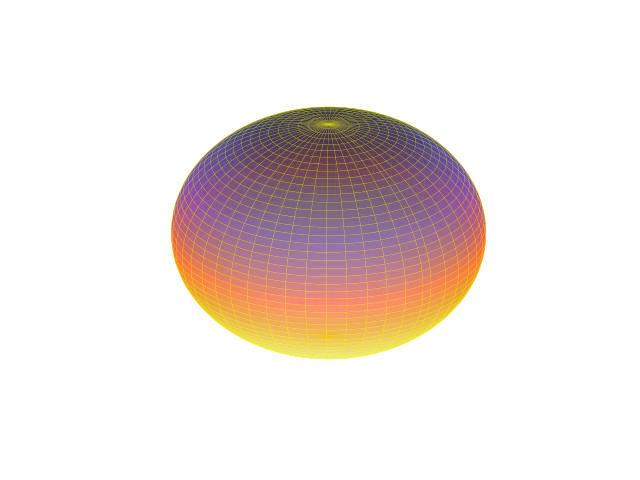

(-10.993329764835574,
 10.998363707289908,
 -10.997230983107517,
 10.997230983107517)

In [30]:
from numpy import *
import pylab as p
#import matplotlib.axes3d as p3
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import cm
%matplotlib notebook

# u and v are parametric variables.
# u is an array from 0 to 2*pi, with 100 elements
u=r_[0:2*pi:100j]
# v is an array from 0 to 2*pi, with 100 elements
v=r_[0:pi:100j]
# x, y, and z are the coordinates of the points for plotting
# each is arranged in a 100x100 array
x=10*outer(cos(u),sin(v))
y=10*outer(sin(u),sin(v))
z=10*outer(ones(size(u)),cos(v))
#x=outer(np.exp(-u**2),np.exp(-v**2))

fig=p.figure();ax = p3.Axes3D(fig)
ax.plot_surface(x,y,z,cmap=cm.CMRmap_r, \
                alpha=.6, shade=True, antialiased=True, linewidth=0.1, 
                edgecolors=(1,1,0))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.axis('off')
#p.show()

<IPython.core.display.Javascript object>


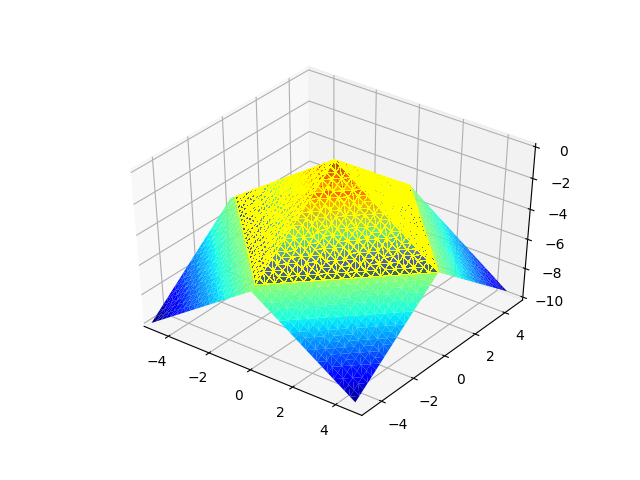

(-10, 0)

In [29]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)

Z = -(abs(X) + abs(Y))

## 1) Initial surface
# Flatten mesh arrays, necessary for plot_trisurf function
X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()

# Plot initial 3D surface with triangles (more flexible than quad)
surfi = ax.plot_trisurf(X, Y, Z, cmap=cm.jet, linewidth=0.2)

## 2) Cut off
# Get desired values indexes
cut_idx = np.where(Z > -5)

# Apply the "cut off"
Xc = X[cut_idx]
Yc = Y[cut_idx]
Zc = Z[cut_idx]

# Plot the new surface (it would be impossible with quad grid)
surfc = ax.plot_trisurf(Xc, Yc, Zc, cmap=cm.jet,\
                        alpha=.6, shade=True, antialiased=False,  \
                        linewidth=0.1,edgecolors=(1,1,0))

# You can force limit if you want to compare both graphs...
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(-10,0)

#plt.show()